# Relaxation methods for elliptic PDEs

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Poisson's equation: $$\nabla^2 \phi = \rho/\epsilon_0$$

Set $\rho = 0$ to get Laplace's equation and discretise using a uniform mesh in $x$ and $y$ to get:

$$  \frac{\phi_{i+1,j} - 2\phi_{i,j} + \phi_{i-1,j}}{\Delta x^{2}} +
  \frac{\phi_{i,j+1} - 2\phi_{i,j} + \phi_{i,j-1}}{\Delta x^{2}} = 0$$
  
  Re-arranging, we find that the solution will satisfy:

$$\phi_{i,j} = \frac{1}{4}\left(\phi_{i+1,j} + \phi_{i-1,j} + \phi_{i,j+1} + \phi_{i,j-1}\right)$$

If this condition is *not* satisfied, then a relaxation method seeks the solution by changing the equation above from a requirement to an update:

$$\phi^{k+1}_{i,j} = \frac{1}{4}\left(\phi^{k}_{i+1,j} + \phi^{k}_{i-1,j} + \phi^{k}_{i,j+1} + \phi^{k}_{i,j-1}\right)$$

Consider as an alternative the steady-state solution of the following parabolic PDE:
$$\frac{\partial \phi}{\partial t} = \nabla^2 \phi$$
In the steady state, $\partial \phi/\partial t = 0$ so the solution would also obey Laplace's equation. 

If we discretise once more (using a simple forward difference for the time derivative; we will use indices `i` and `j` for $x$ and $y$ grids and `n` for timesteps) we find:

$$\phi_{i,j,n+1} = \phi_{i,j,n} + \frac{\Delta t}{\Delta x^2}\left(\phi_{i+1,j,n} + \phi_{i-1,j,n} + \phi_{i,j+1,n} + \phi_{i,j-1,n} - 4\phi_{i,j,n}\right)$$

It is relatively easy to show that the largest stable timestep for this evolution in 2D is given by $\Delta t = \Delta x^2/4$ which gives the result:

$$\phi_{i,j,n+1} = \frac{1}{4}\left(\phi_{i+1,j,n} + \phi_{i-1,j,n} + \phi_{i,j+1,n} + \phi_{i,j-1,n}\right)$$

In [2]:
def update_phi(phi,N):
    """Use Jacobi method to update phi on grid (NxN)
    
    Note that the boundaries are not correct and need to be updated
    
    Inputs:
    phi  Potential in 2D on NxN grid
    N    Grid size
    
    Output:
    phi_new  Updated phi
    """
    phiout = np.zeros_like(phi)
    phiout = 0.25*(np.roll(phi,1,axis=0) + np.roll(phi,-1,axis=0) + np.roll(phi,1,axis=1) + np.roll(phi,-1,axis=1))
    return phiout

In [24]:
N = 15
phi = np.zeros((N,N))
phi[0,:] = 4
phi[-1,:] = 4
phi[:,0] = 3
phi[:,-1] = 3
phi[0,0] = 3.5
phi[0,N-1] = 3.5
phi[N-1,0] =  3.5
phi[N-1,N-1] = 3.5

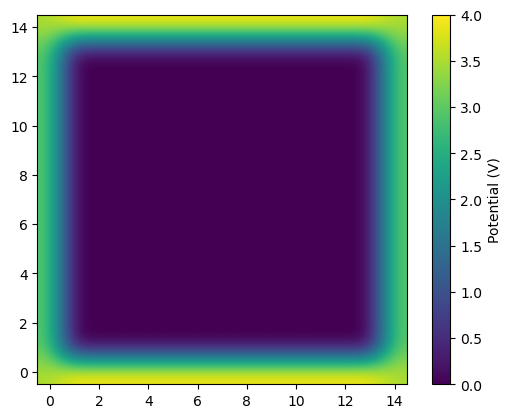

In [25]:
plt.imshow(phi,origin='lower',interpolation='bicubic')
plt.colorbar(label='Potential (V)')

In [26]:
tol = 1e-4
maxiters = 1000
# Change
delta  = 1.0 
iters = 1
while delta>tol and iters<maxiters:
    phi_next = update_phi(phi,N)
    # Apply boundary conditions
    phi_next[0,:] = 4
    phi_next[-1,:] = 4
    phi_next[:,0] = 3
    phi_next[:,-1] = 3
    delta = np.max(np.abs(phi_next - phi))
    phi = np.copy(phi_next)
    iters += 1
print(f"Finished after {iters} iterations with largest change {delta}")

Finished after 289 iterations with largest change 9.527593779701249e-05


Text(0, 0.5, 'y')

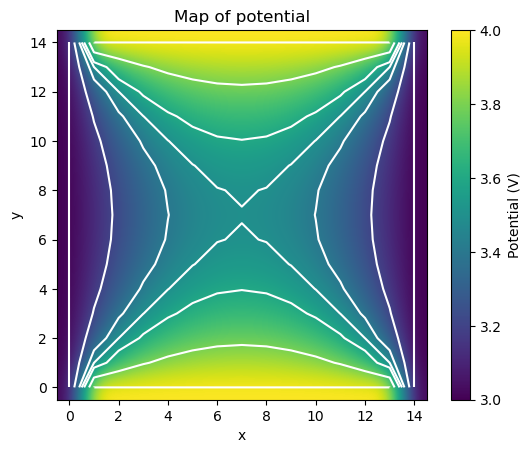

In [27]:
plt.imshow(phi,origin='lower',interpolation='bicubic')
plt.colorbar(label='Potential (V)')
plt.contour(phi,colors='white',levels=[3.0,3.2,3.4,3.5,3.6,3.8,3.9999])
plt.title('Map of potential')
plt.xlabel('x')
plt.ylabel('y')